# Part 1: Data preprocessing

## Importing the libraries and datasaet

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv("financial_data.csv")

## data exploration

In [90]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [91]:
data.shape

(17908, 21)

In [92]:
data.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [94]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## dealing with null values

In [95]:
# checking do we have a missing values or not
data.isnull().values.any()

False

In [96]:
# meeqo row oo null values ah ayaan heesanaa.
data.isnull().values.sum()

0

## encoding the categoricald ata

In [97]:
# display all the columns that are  categorical variables.
data.select_dtypes(include = 'object').columns

Index(['pay_schedule'], dtype='object')

In [98]:
# how many categorical variables do we have
len(data.select_dtypes(include = 'object').columns)

1

In [99]:
# display all the  unique values that are there on pay_schedule
data.pay_schedule.unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [100]:
# number of uniques values that are on pay_schedule variable.
data.pay_schedule.nunique()

4

In [101]:
# shape of the data (rows and columns)
data.shape

(17908, 21)

In [102]:
# making all the categories that are on pay_schedule individual column( 0 1) , laga reebo midka ugu sareeyo.
data = pd.get_dummies(data=data, drop_first = True)

In [103]:
# after adding more columns when chagning categorical to numerical.
data.shape

(17908, 23)

In [104]:
data.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [105]:
data.shape

(17908, 23)

In [106]:
 # how many categorical variables do we have
len(data.select_dtypes(include = 'object').columns)

0

## bar

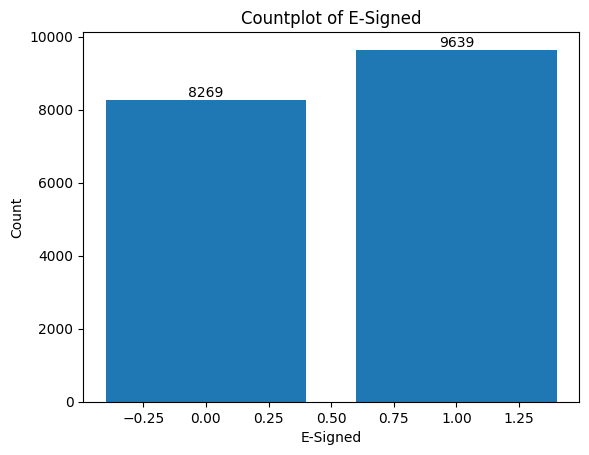

In [107]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'e_signed' column
value_counts = data['e_signed'].value_counts()

# Sort the values in descending order
sorted_counts = value_counts.sort_values(ascending=True)

plt.bar(sorted_counts.index, sorted_counts.values)

# Add count values on top of the bars
for i, v in enumerate(sorted_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Optionally, you can customize the plot's appearance
plt.title('Countplot of E-Signed')
plt.xlabel('E-Signed')
plt.ylabel('Count')

# Display the plot
plt.show()

## Restructure the dataset

In [108]:
data.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


### Combining monthe employee and years emplooye by calcuating months

In [109]:
data['months employee'] = (data.months_employed + data.years_employed * 12)

In [110]:
data.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employee
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [111]:
data = data.drop(columns = ['months_employed','years_employed'])

In [112]:
data.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employee
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


### Combining personal account month and personal account year by calcuating months

In [113]:
data['Personal account months'] = (data.personal_account_m + data.personal_account_y * 12)

In [114]:
data.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employee,Personal account months
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [115]:
data = data.drop(columns = ['personal_account_m','personal_account_y'])

In [116]:
data.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employee,Personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


## Correlation matrix and heatmap

In [117]:
data_2 = data.drop(columns =['entry_id', 'e_signed'])

<Axes: title={'center': 'Correalted with e_signed'}>

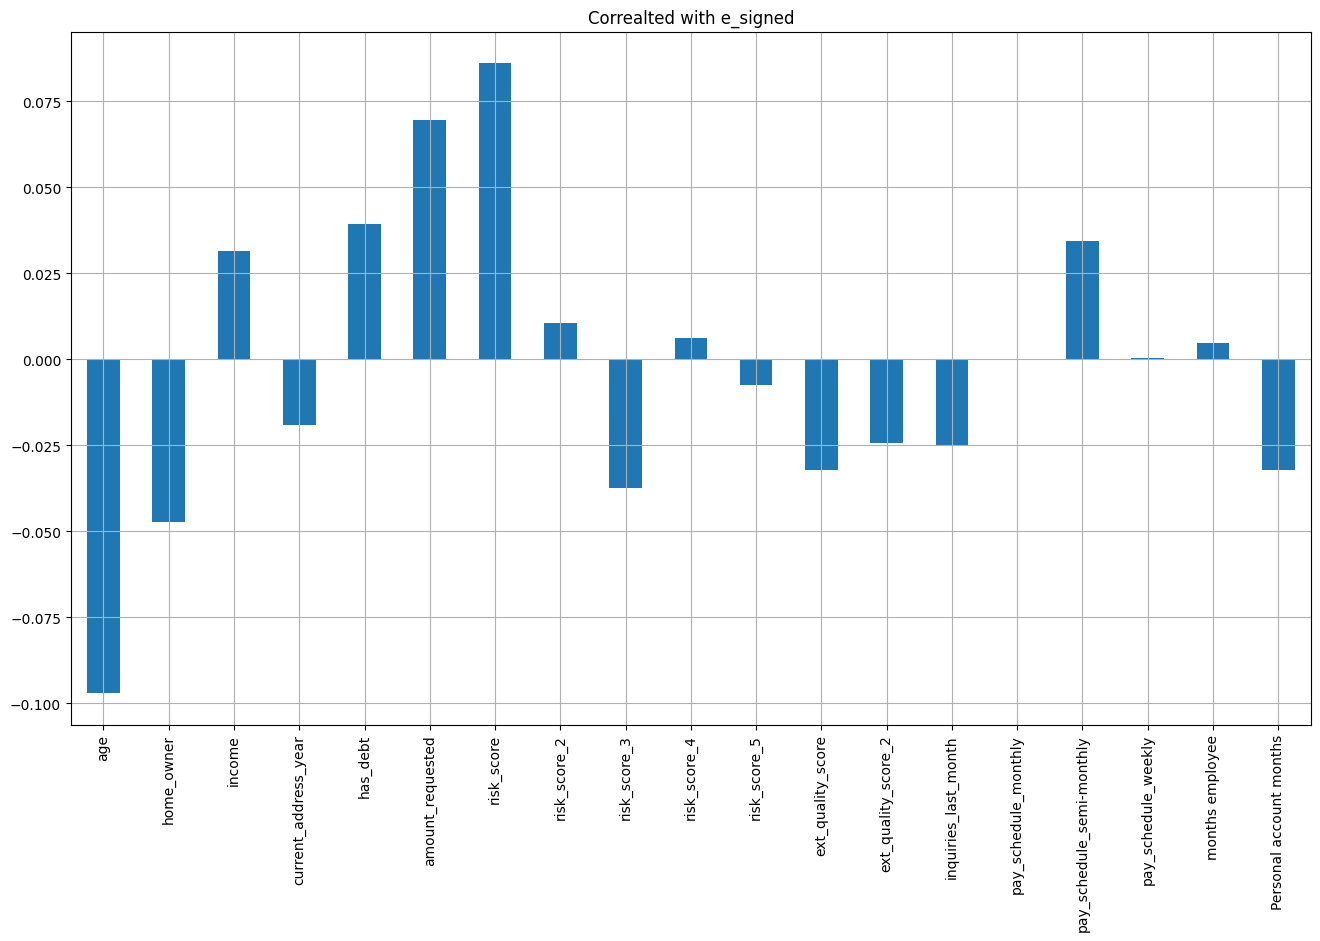

In [118]:
data_2.corrwith(data['e_signed']).plot.bar(
    figsize = (16,9), title = 'Correalted with e_signed', grid=True
)

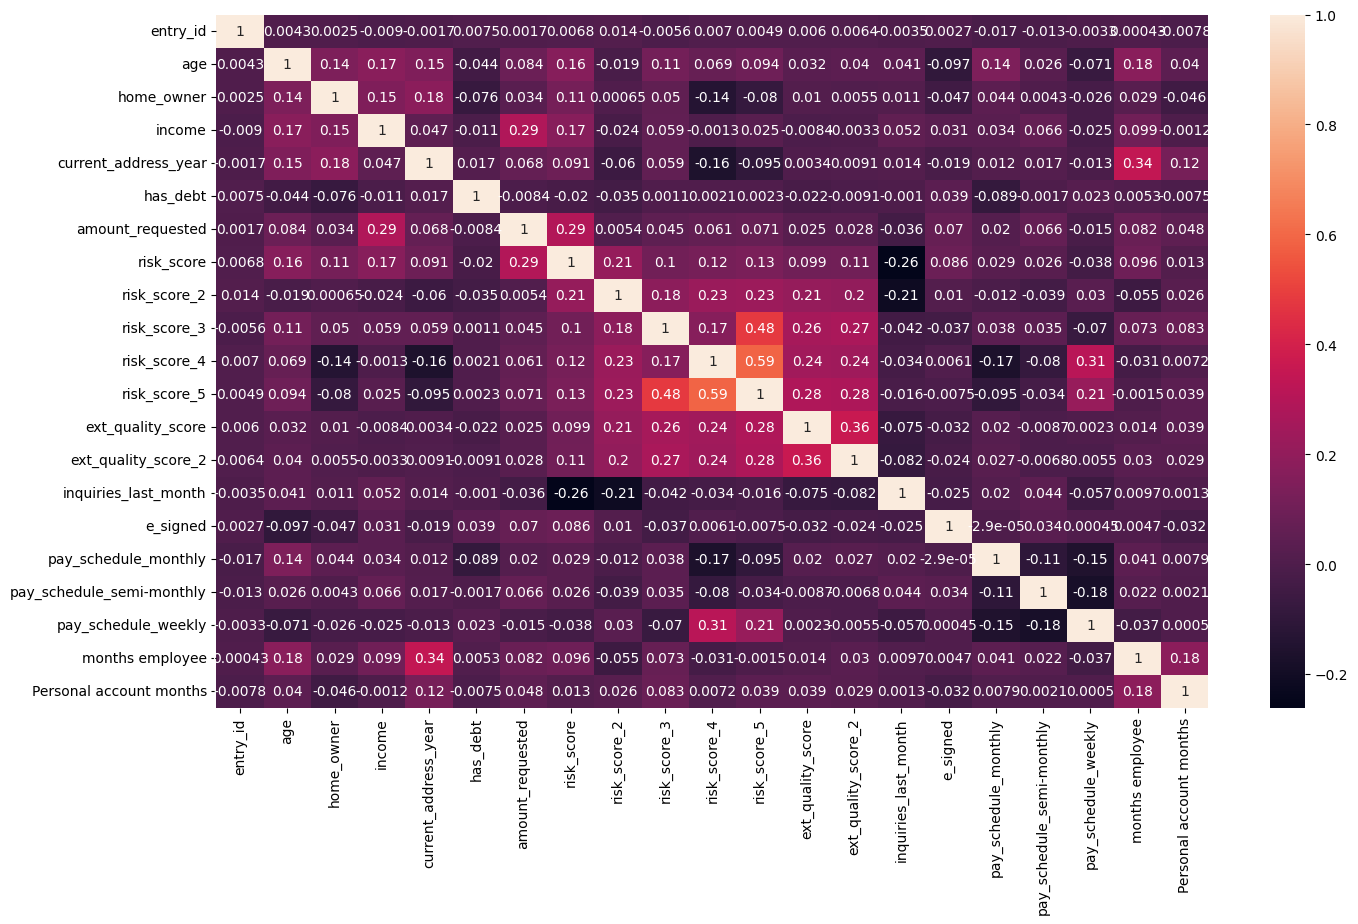

In [119]:
# heatmpa
plt.figure(figsize =(16,9))
ax = sns.heatmap(data.corr(), annot = True)

##  Splitting the dataset

In [120]:
data.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employee,Personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [121]:
# independent variables / matrix features
x = data.drop(columns = ['entry_id', 'e_signed'])

In [122]:
# target variables
y= data.e_signed

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 0)

In [124]:
x_train.shape

(14326, 19)

In [125]:
x_test.shape

(3582, 19)

In [126]:
y_train.shape

(14326,)

In [127]:
y_test.shape

(3582,)

## Feature Scalling

In [128]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()

In [129]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [130]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

# New Section

In [131]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

# Part 2:  Building the model

## 1) Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [133]:
y_pred = classifier_lr.predict(x_test)

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [135]:
accuracy_score(y_test, y_pred)

0.5628140703517588

In [136]:
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

## 2) SVM

In [137]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state = 0)
classifier_svc.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier_svc.predict(x_test)

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [139]:
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

## 3) Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [141]:
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

## 4) XGBoost Classifier

In [142]:
from xgboost import XGBRFClassifier
classifier_xgb = XGBRFClassifier(random_state = 0)
classifier_xgb.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=0, reg_alpha=None, ...)

In [ ]:
y_pred = classifier_xgb.predict(x_test)

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [144]:
accuracy_score(y_test, y_pred)

0.5628140703517588

In [145]:
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

# Part 3: Applying Randomized Search to find the best parameters

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
parameters = {
    "learning_rate" : [0.0, 0.10, 0.15, 0.20, 0.25,0.30],
    'max_depts' : [2,3,4,5,6,8,10,12,15],
    'min_child_weights' : [1,3,5,7],
    'gamma' : [0.00, 0.10, 0.2, 0.3, 0.4],
    'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7],
    'n_estimators': [100,200,300,400,500],
    'subsample': [0.5, 0.7, 1.0]
}

In [148]:
parameters

{'learning_rate': [0.0, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depts': [2, 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weights': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
 'n_estimators': [100, 200, 300, 400, 500],
 'subsample': [0.5, 0.7, 1.0]}

In [149]:
random_cv = RandomizedSearchCV(estimator = classifier_xgb, param_distributions= parameters, n_iter = 5, scoring = 'roc_auc', n_jobs = 1, cv = 5, verbose = 1 )

In [150]:
random_cv.fit(x_train,y_train )

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:41:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depts", "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:41:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depts", "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:41:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depts", "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:41:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depts", "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:41:12] WARNING: /works

RandomizedSearchCV(cv=5,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=No...
                                             objective='binary:logistic',
                                             random_state=0, reg_alpha=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depts': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weights': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=1)

In [151]:
random_cv.best_estimator_

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.3, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.4,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_depts=5,
                max_leaves=None, min_child_weight=None, min_child_weights=1,
                missing=nan, monotone_constraints=None, multi_strategy=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [152]:
random_cv.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'min_child_weights': 1,
 'max_depts': 5,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [153]:
random_cv.best_score_

0.6824841896595293

# part 4: Final Model (XGBoost Classifier)

In [154]:
from xgboost import XGBRFClassifier
classifier = XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.5, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.1,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_depts=5,
                max_leaves=None, min_child_weight=None, min_child_weights=5,
                 monotone_constraints=None, multi_strategy=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=None)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:41:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depts", "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.5, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.1,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_depts=5,
                max_leaves=None, min_child_weight=None, min_child_weights=5,
                missing=nan, monotone_constraints=None, multi_strategy=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [157]:
y_pred = classifier.predict(x_test)

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)


0.5429927414852038

# Part 5 : Predicting a single observation

In [159]:
data.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employee,Personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [164]:
single_obs = [[45,1,2500,3,1,600,37000,0.7373,0.9035,0.4877, 0.515977, 0.580918, 0.380918, 10, 0, 0 , 0, 36, 30]]

In [167]:
classifier_xgb.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])